<a href="https://colab.research.google.com/github/felipemunarol/UFF-Projects/blob/main/src/de_para_conj_municipios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inclui nos dados de unidades geograficas (conjuntos), os respectivos municipios em que estas estao contidas. Para verificar a condição de pertencimento (estar contido) deve-se ser definida a regra de avaliacao pois como sao dois poligonos (unidade geografica e municipio) formados por "infinitos" pontos não há uma única forma de regra. Para este trabalho é considerado o ponto central do poligono como representacao geografica da localização desta entidade e avaliado se este ponto (lat, long) esta contido dentro do municipio definido pelo IBGE.

In [ ]:
! pip install geopandas

Realiza o de-para de identificador do conjunto e a o municipio a qual pertence. Dado que um conjunto pode atraversar diversos municipios, é utilizado o ponto central do conjunto como o seu ponto referencia.



In [ ]:
import pandas as pd
import os
import sys
import ast

import requests
import csv
import geopandas as gpd
import codecs

# Conecta o serviço com o Drive
from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)

# Conecta o serviço com o Drive
from google.colab import drive
drive.mount('/content/drive')

os.environ['ROOT'] = '/content/drive/MyDrive/Mestrado/Ordens_servico/'
base_path = os.environ.get("ROOT")

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
de_para_conj = gpd.read_file(base_path + "Ordens_servico/de_para_und_cons_unit_med_.json", driver='GeoJSON')

In [ ]:
de_para_conj

,Name,Unnamed: 0,IdeConjUndConsumidoras,DscConjUndConsumidoras,MUN_MINIMUM_BOUND_RADIO,MUN_NUMBER_OF_BOUNDARYS,AREA,LENGTH,units_med,distance,geometry
0,12525,110418,12525.0,CAMAQUÃ,0.561293,149,0.438325,3.710852,CAMAQUA,0.000000,"POLYGON Z ((-51.50051 -30.96237 0.00000, -51.3..."
1,16509,325886,16509.0,Guaporé,0.320427,531,0.122356,3.512604,SERAFINA CORREA,0.000000,"POLYGON Z ((-52.02439 -28.74837 0.00000, -51.9..."
2,15630,5815,15630.0,DOURADOS DAS NAÇÕES,0.194285,516,0.043815,1.150031,DOURADOS,0.125832,"POLYGON Z ((-54.67014 -22.17814 0.00000, -54.6..."
3,13593,111517,13593.0,TIETE,0.161835,440,0.029765,1.444788,PIRACICABA,0.226205,"POLYGON Z ((-47.80600 -22.88300 0.00000, -47.7..."
4,15044,4255,15044.0,TERRA NOVA AEREO,0.022936,408,0.000660,0.298677,RIO DE JANEIRO - VILA MILITAR,0.107783,"POLYGON Z ((-43.27286 -22.87173 0.00000, -43.2..."
...,...,...,...,...,...,...,...,...,...,...,...
2962,16198,6992,16198.0,MATOES,0.538188,539,0.305642,3.259529,ANGICAL DO PIAUI,0.330930,"POLYGON Z ((-43.19809 -5.27831 0.00000, -43.18..."
2963,12907,110762,12907.0,EMBU GUAÇU,0.126946,90,0.015497,0.764108,SAO PAULO - INTERLAGOS,0.095015,"POLYGON Z ((-46.78748 -23.74952 0.00000, -46.7..."
2964,12863,429525,12863.0,MIMOSO,0.486715,3552,0.490099,3.317999,AGUA CLARA,0.483630,"POLYGON Z ((-53.62570 -20.45397 0.00000, -53.6..."
2965,13771,327562,13771.0,RODEIRO,0.126113,77,0.019781,0.775100,MURIAE,0.308235,"POLYGON Z ((-42.89234 -21.22334 0.00000, -42.9..."


In [ ]:
# Plot of the sets area

<Axes: >

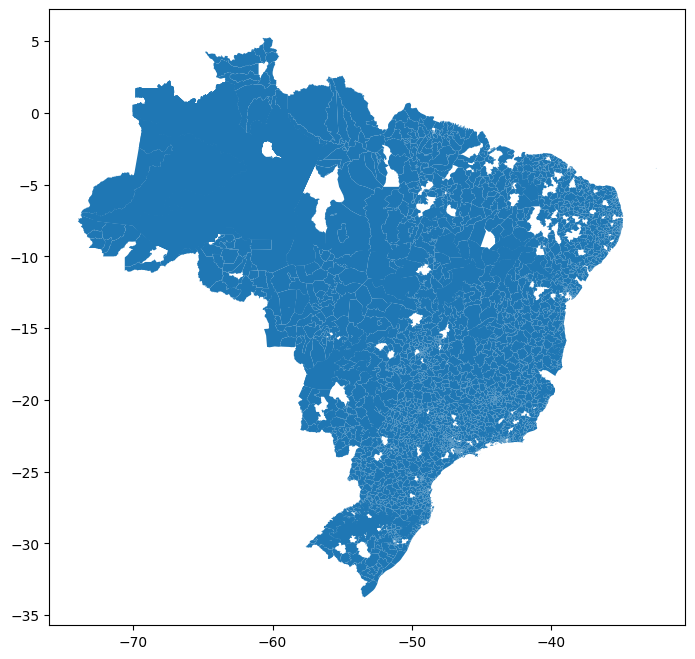

In [ ]:
de_para_conj.plot(figsize=(12,8))

In [ ]:
gpd_mun = gpd.read_file(base_path + "/Ordens_servico/geo_reference/BR_Municipios_2022.shp")

KeyboardInterrupt: ignored

<Axes: >

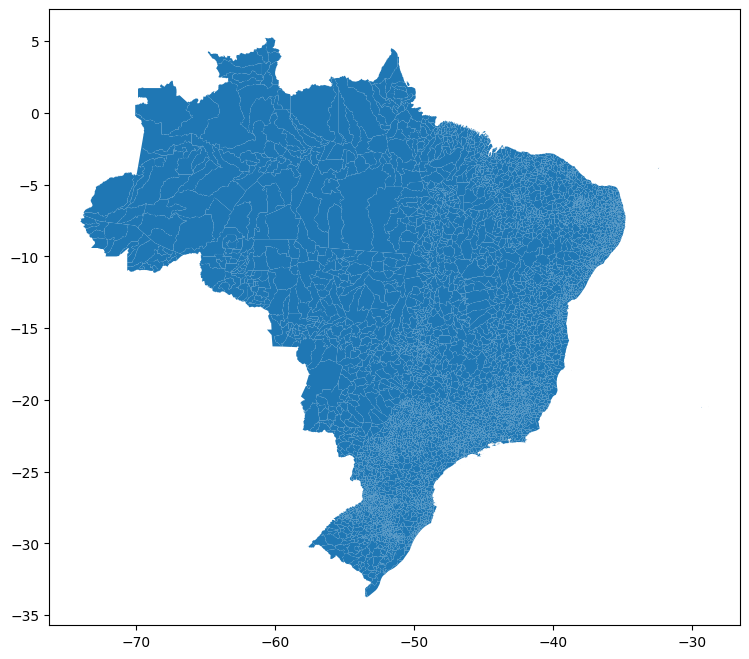

In [ ]:
gpd_mun.plot(figsize=(12,8))

In [ ]:
gpd_mun

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.11910, -60.81773 -13.1..."
...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.31170 -16.8..."
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7..."
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.07780 -15.06364, -47.07799 -15.0..."
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3..."


<ipython-input-25-84d4425828ef>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  de_para_conj.centroid.plot(marker='*', color='green', markersize=5, figsize=(12, 8))


<Axes: >

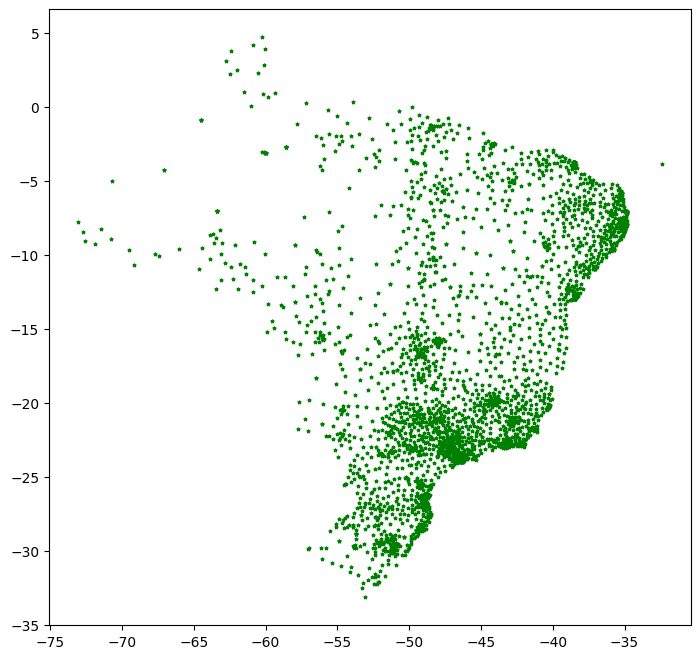

In [ ]:
de_para_conj.centroid.plot(marker='*', color='green', markersize=5, figsize=(12, 8))

<Axes: >

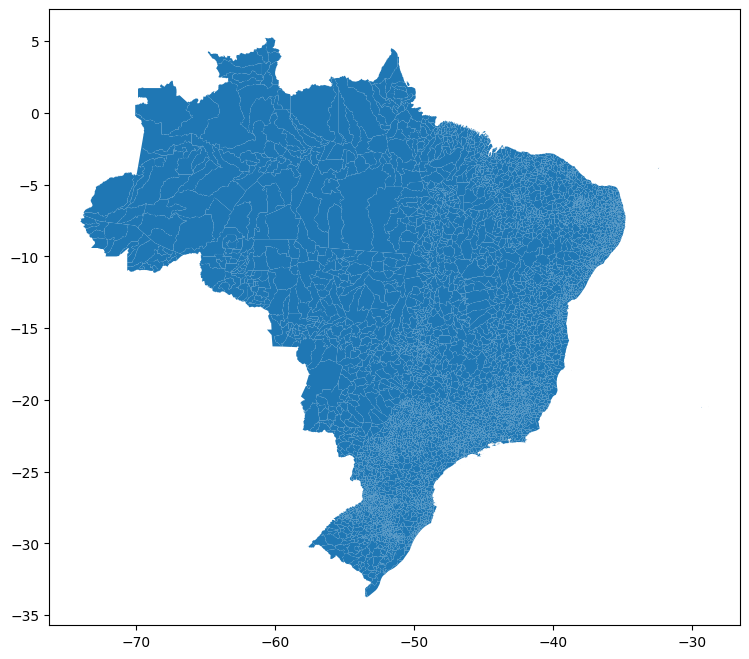

In [ ]:
gpd_mun.plot(figsize=(12, 8))

<ipython-input-27-a63c2a54f3b8>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base = de_para_conj.centroid.plot(marker='*', color='green', markersize=5, figsize=(12, 8), ax=base)


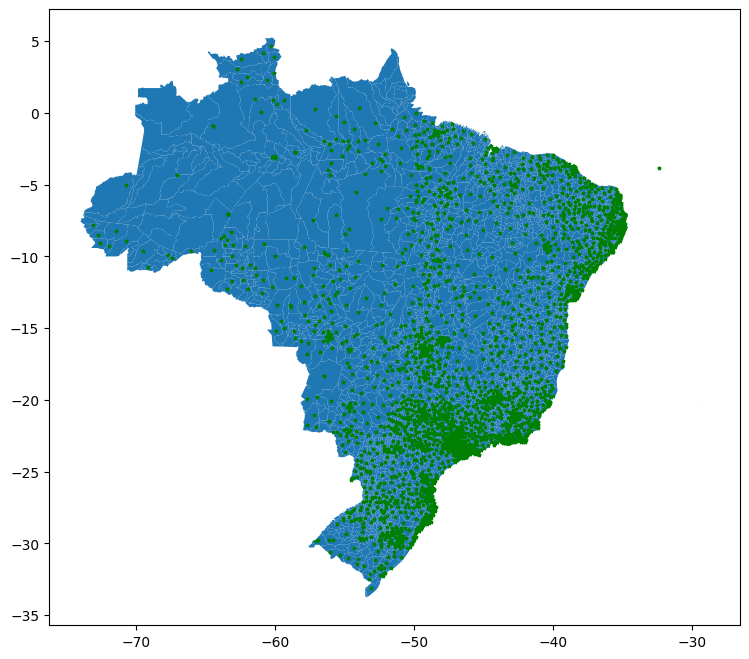

In [ ]:
base = gpd_mun.plot(figsize=(12, 8))

base = de_para_conj.centroid.plot(marker='*', color='green', markersize=5, figsize=(12, 8), ax=base)

## Inclui o municipio na base de conjuntos em que o centroide esta contido

In [ ]:
gpd_mun

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,1100015,Alta Floresta D'Oeste,RO,7067.127,"POLYGON ((-62.00806 -12.13379, -62.00784 -12.2..."
1,1100023,Ariquemes,RO,4426.571,"POLYGON ((-63.17933 -10.13924, -63.17746 -10.1..."
2,1100031,Cabixi,RO,1314.352,"POLYGON ((-60.52408 -13.32137, -60.37162 -13.3..."
3,1100049,Cacoal,RO,3793.000,"POLYGON ((-61.35502 -11.50452, -61.35524 -11.5..."
4,1100056,Cerejeiras,RO,2783.300,"POLYGON ((-60.82135 -13.11910, -60.81773 -13.1..."
...,...,...,...,...,...
5567,5222005,Vianópolis,GO,954.115,"POLYGON ((-48.31126 -16.84221, -48.31170 -16.8..."
5568,5222054,Vicentinópolis,GO,733.794,"POLYGON ((-49.73613 -17.74427, -49.73624 -17.7..."
5569,5222203,Vila Boa,GO,1052.593,"POLYGON ((-47.07780 -15.06364, -47.07799 -15.0..."
5570,5222302,Vila Propício,GO,2181.593,"POLYGON ((-48.58713 -15.31847, -48.58714 -15.3..."


In [ ]:
polygons = gpd_mun.geometry
ds_munic = gpd_mun.NM_MUN
ds_uf = gpd_mun.SIGLA_UF


# Convert the cordinate to a flat position, to find the center, then convert it back
de_para_conj['point'] = de_para_conj.to_crs('+proj=cea').centroid.to_crs(de_para_conj.crs)

In [ ]:
# Funcao que acrescenta a cada conjunto o municipio em que seu centroide esta contido

def ident_conj(point):

  for polygon, munic, uf in zip(polygons, ds_munic, ds_uf):
    if point:
      if point.intersects(polygon):
        return (munic, uf)

def fillnone(value):
  print(value)
  if not value:
    return(None, None)
  else:
    return(value)



de_para_conj["ds_munic_uf"] = de_para_conj["point"].apply(ident_conj)
# Turn None in a vector for numpy understand the shape of vector (n, 2)
de_para_conj["ds_munic_uf"] = de_para_conj["ds_munic_uf"].apply(fillnone)
de_para_conj[["ds_munic", "ds_uf"]] = de_para_conj.ds_munic_uf.tolist()
de_para_conj["ds_munic_uf"]

('Camaquã', 'RS')
('Guaporé', 'RS')
('Dourados', 'MS')
('Tietê', 'SP')
('Rio de Janeiro', 'RJ')
('Astolfo Dutra', 'MG')
('Patos de Minas', 'MG')
('Nova Lacerda', 'MT')
('Mara Rosa', 'GO')
('Taguatinga', 'TO')
('Oliveira dos Brejinhos', 'BA')
('Estância Velha', 'RS')
('Dois Vizinhos', 'PR')
('Guarujá', 'SP')
('Ivinhema', 'MS')
('Itaboraí', 'RJ')
('Ribeirão das Neves', 'MG')
('Brasília', 'DF')
('Rio do Antônio', 'BA')
('Caxias do Sul', 'RS')
('São José do Cerrito', 'SC')
('Apucarana', 'PR')
('Cianorte', 'PR')
('Bariri', 'SP')
('Santarém', 'PA')
('Natividade', 'TO')
('Mata de São João', 'BA')
('Entre Rios', 'BA')
('Teotônio Vilela', 'AL')
('Tamandaré', 'PE')
('São Paulo', 'SP')
None
('São Francisco de Itabapoana', 'RJ')
('Divinópolis', 'MG')
('Aragarças', 'GO')
('Jaíba', 'MG')
('Itapoá', 'SC')
('Lapa', 'PR')
('São Paulo', 'SP')
('Rio de Janeiro', 'RJ')
('São Francisco do Guaporé', 'RO')
('Santa Terezinha', 'BA')
('Cumaru', 'PE')
('Santarém', 'PA')
('Macaé', 'RJ')
('Dores de Campos', 'MG')

0                  (Camaquã, RS)
1                  (Guaporé, RS)
2                 (Dourados, MS)
3                    (Tietê, SP)
4           (Rio de Janeiro, RJ)
                  ...           
2962             (Parnarama, MA)
2963            (Embu-Guaçu, SP)
2964    (Ribas do Rio Pardo, MS)
2965              (Guidoval, MG)
2966     (Bom Jesus da Lapa, BA)
Name: ds_munic_uf, Length: 2967, dtype: object

In [ ]:
de_para_conj

,Name,Unnamed: 0,IdeConjUndConsumidoras,DscConjUndConsumidoras,MUN_MINIMUM_BOUND_RADIO,MUN_NUMBER_OF_BOUNDARYS,AREA,LENGTH,units_med,distance,geometry,point,ds_munic_uf,ds_munic,ds_uf
0,12525,110418,12525.0,CAMAQUÃ,0.561293,149,0.438325,3.710852,CAMAQUA,0.000000,"POLYGON Z ((-51.50051 -30.96237 0.00000, -51.3...",POINT (-51.89064 -30.90998),"(Camaquã, RS)",Camaquã,RS
1,16509,325886,16509.0,Guaporé,0.320427,531,0.122356,3.512604,SERAFINA CORREA,0.000000,"POLYGON Z ((-52.02439 -28.74837 0.00000, -51.9...",POINT (-51.96452 -28.87074),"(Guaporé, RS)",Guaporé,RS
2,15630,5815,15630.0,DOURADOS DAS NAÇÕES,0.194285,516,0.043815,1.150031,DOURADOS,0.125832,"POLYGON Z ((-54.67014 -22.17814 0.00000, -54.6...",POINT (-54.68264 -22.23658),"(Dourados, MS)",Dourados,MS
3,13593,111517,13593.0,TIETE,0.161835,440,0.029765,1.444788,PIRACICABA,0.226205,"POLYGON Z ((-47.80600 -22.88300 0.00000, -47.7...",POINT (-47.71610 -23.02645),"(Tietê, SP)",Tietê,SP
4,15044,4255,15044.0,TERRA NOVA AEREO,0.022936,408,0.000660,0.298677,RIO DE JANEIRO - VILA MILITAR,0.107783,"POLYGON Z ((-43.27286 -22.87173 0.00000, -43.2...",POINT (-43.28267 -22.86543),"(Rio de Janeiro, RJ)",Rio de Janeiro,RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,16198,6992,16198.0,MATOES,0.538188,539,0.305642,3.259529,ANGICAL DO PIAUI,0.330930,"POLYGON Z ((-43.19809 -5.27831 0.00000, -43.18...",POINT (-43.31105 -5.70546),"(Parnarama, MA)",Parnarama,MA
2963,12907,110762,12907.0,EMBU GUAÇU,0.126946,90,0.015497,0.764108,SAO PAULO - INTERLAGOS,0.095015,"POLYGON Z ((-46.78748 -23.74952 0.00000, -46.7...",POINT (-46.83704 -23.85680),"(Embu-Guaçu, SP)",Embu-Guaçu,SP
2964,12863,429525,12863.0,MIMOSO,0.486715,3552,0.490099,3.317999,AGUA CLARA,0.483630,"POLYGON Z ((-53.62570 -20.45397 0.00000, -53.6...",POINT (-53.63824 -20.87386),"(Ribas do Rio Pardo, MS)",Ribas do Rio Pardo,MS
2965,13771,327562,13771.0,RODEIRO,0.126113,77,0.019781,0.775100,MURIAE,0.308235,"POLYGON Z ((-42.89234 -21.22334 0.00000, -42.9...",POINT (-42.80480 -21.19028),"(Guidoval, MG)",Guidoval,MG


In [ ]:
de_para_conj[de_para_conj.ds_munic.isnull()].drop_duplicates('DscConjUndConsumidoras')   # verifica se existe algum nulo nos dados de geometria

,Name,Unnamed: 0,IdeConjUndConsumidoras,DscConjUndConsumidoras,MUN_MINIMUM_BOUND_RADIO,MUN_NUMBER_OF_BOUNDARYS,AREA,LENGTH,units_med,distance,geometry,point,ds_munic_uf,ds_munic,ds_uf
31,15037,4135,15037.0,GUANABARA AEREO,0.084137,1618,0.003113,0.753695,NITEROI,0.063413,"POLYGON Z ((-43.10561 -22.74950 0.00000, -43.1...",POINT (-43.16313 -22.79177),"(None, None)",None,None
390,15015,113089,15015.0,RAMOS AEREO,0.028657,1237,0.000743,0.371042,NITEROI,0.106741,"POLYGON Z ((-43.22967 -22.83720 0.00000, -43.2...",POINT (-43.23767 -22.85378),"(None, None)",None,None
516,13693,111610,13693.0,CABEDELO,0.057951,199,0.003271,0.311223,JOAO PESSOA,0.093187,"POLYGON Z ((-34.83879 -7.07353 0.00000, -34.83...",POINT (-34.84230 -7.01125),"(None, None)",None,None
2266,15047,113137,15047.0,CAMPO MARTE AEREO,0.027623,588,0.000691,0.338309,RIO DE JANEIRO - FORTE DE COPACABANA,0.080005,"POLYGON Z ((-43.19593 -22.89206 0.00000, -43.1...",POINT (-43.21238 -22.89326),"(None, None)",None,None


In [ ]:
de_para_conj[["IdeConjUndConsumidoras", "DscConjUndConsumidoras", "geometry", "ds_munic", "ds_uf", "MUN_MINIMUM_BOUND_RADIO", "MUN_NUMBER_OF_BOUNDARYS", "AREA"]].to_file(base_path + "Ordens_servico/de_para_und_cons_unit_med_mun.json", driver='GeoJSON')